In [ ]:
# 📊 Customer Churn Prediction - Data Science Case Study

## 📌 Problem Statement
Customer churn is a major challenge in subscription-based businesses. Identifying customers who are likely to leave allows companies to take proactive measures, improve customer retention, and maximize revenue. 

In this project, we analyze customer churn using **machine learning** and **data visualization** techniques. The goal is to:
- **Explore factors that influence customer churn.**
- **Train predictive models to identify at-risk customers.**
- **Extract business insights for decision-making.**

## 📂 Dataset Overview
The dataset is sourced from **[Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)** and contains:
- **Customer demographics** (gender, senior citizen, partner, dependents).
- **Subscription details** (contract type, internet service, payment method).
- **Usage patterns** (monthly charges, total charges, tenure).
- **Churn label** (whether the customer left the company).

## 🛠 Workflow Overview
This notebook walks through the entire data science pipeline:
1. **Exploratory Data Analysis (EDA)** – Understanding customer churn trends.
2. **Feature Engineering** – Preparing the data for machine learning.
3. **Model Training & Evaluation** – Comparing multiple models for churn prediction.
4. **Feature Importance Analysis** – Identifying key drivers of churn.
5. **Dimensionality Reduction (PCA)** – Visualizing churn patterns in reduced dimensions.
6. **Power BI Integration** – Creating interactive business dashboards.
7. **Business Insights & Recommendations** – Turning data into actionable strategies.

---


In [1]:
# 📥 Load Required Libraries

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Model Saving & Loading
import joblib
import os


In [2]:
# 📥 Load the dataset
df = pd.read_csv('../data/telco_customer_churn.csv')

# 🧐 Quick overview of the dataset
print("Dataset Shape:", df.shape)
display(df.head(2))  # Show the first 2 rows

# 🧹 Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# 🔎 Check data types
print("\nData Types:")
print(df.dtypes)


Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No



Missing Values per Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentM

In [3]:
# 🛠 Convert 'TotalCharges' to numeric, replacing non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 🔍 Check for any new missing values after conversion
print("\nMissing Values After Conversion:")
print(df.isnull().sum())

# 🧹 Fill missing TotalCharges with the median value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# ✅ Verify conversion
print("\nUpdated Data Types:")
print(df.dtypes)



Missing Values After Conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Updated Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
P

C:\Users\bobov\AppData\Local\Temp\ipykernel_7732\115663973.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [4]:
# 🧹 Fill missing TotalCharges with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# ✅ Final check to confirm no missing values
print(df.isnull().sum().sum())  # Should print 0 if all missing values are handled


0


C:\Users\bobov\AppData\Local\Temp\ipykernel_7732\2475605791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [5]:
# Convert binary categorical columns to 0/1 (Label Encoding)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert 'gender' to binary (0 = Female, 1 = Male)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# ✅ Verify encoding
print(df[binary_cols + ['gender']].head())


   Partner  Dependents  PhoneService  PaperlessBilling  Churn  gender
0        1           0             0                 1      0       0
1        0           0             1                 0      0       1
2        0           0             1                 1      1       1
3        0           0             0                 0      0       1
4        0           0             1                 1      1       0


In [6]:
# One-Hot Encode categorical columns (drop the first category to avoid multicollinearity)
multi_category_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_category_cols, drop_first=True)

# ✅ Verify encoding
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines OnlineSecurity OnlineBackup  ...  \
0             0  No phone service             No          Yes  ...   
1             1                No            Yes           No  ...   
2             1                No            Yes          Yes  ...   
3             0  No phone service            Yes           No  ...   
4             1                No             No           No  ...   

  MonthlyCharges TotalCharges Churn InternetService_Fiber optic  \
0          29.85        29.85     0                       False   
1          56.95      1889.50 

In [7]:
# Drop customerID as it's not useful for modeling
df.drop(columns=['customerID'], inplace=True)


In [8]:
# Convert 'Yes' to 1, 'No' to 0, and 'No internet service' to 0 (assuming it's similar to 'No')
yes_no_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# ✅ Verify conversion
print(df[yes_no_cols].head())


   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0            NaN               0             1                 0            0   
1            0.0               1             0                 1            0   
2            0.0               1             1                 0            0   
3            NaN               1             0                 1            1   
4            0.0               0             0                 0            0   

   StreamingTV  StreamingMovies  
0            0                0  
1            0                0  
2            0                0  
3            0                0  
4            0                0  


In [9]:
# Convert only boolean columns to integers
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# ✅ Check final data types
print("\nFinal Data Types:")
print(df.dtypes)




Final Data Types:
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                            float64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year                          int64
C

In [10]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])  # All features except target
y = df['Churn']  # Target variable

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Confirm dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (5634, 23) (5634,)
Test set shape: (1409, 23) (1409,)


In [11]:
# Check for missing values
print("🔍 Checking for missing values in training and test sets:")
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())

# Handling missing values: Impute with median (numerical columns)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  # You can also use 'mean' or 'most_frequent'
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verify again
print("\n✅ Missing values after imputation:")
print("X_train:\n", X_train.isnull().sum().sum())
print("X_test:\n", X_test.isnull().sum().sum())


🔍 Checking for missing values in training and test sets:
Missing values in X_train:
 gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                            559
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_C

In [12]:
# Select numeric features for scaling
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize and apply StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# ✅ Check if scaling worked
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,NaN,0,1,0,...,-1.160323,-0.994242,0,0,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0.0,1,0,1,...,-0.259629,-0.173244,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.236724,1,0.0,1,1,0,...,-0.362660,-0.959674,1,0,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,NaN,1,0,1,...,-0.746535,-0.194766,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.236724,1,0.0,0,0,0,...,0.197365,-0.940470,1,1,0,0,0,0,1,0


In [13]:
df[numeric_features].describe()


,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-1.488074e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.991203e-01
25%,-9.516817e-01,-9.725399e-01,-8.298459e-01
50%,-1.372744e-01,1.857327e-01,-3.904632e-01
75%,9.214551e-01,8.338335e-01,6.642871e-01
max,1.613701e+00,1.794352e+00,2.826743e+00


🔹 Training Logistic Regression...
✅ Accuracy: 0.7736

🔹 Training Random Forest...
✅ Accuracy: 0.7871

🔹 Training Gradient Boosting...
✅ Accuracy: 0.7991


🔎 Model Performance Summary:
Logistic Regression: Accuracy = 0.7736
Random Forest: Accuracy = 0.7871
Gradient Boosting: Accuracy = 0.7991

🏆 Best Model: Gradient Boosting with Accuracy = 0.7991

✅ Best model saved as 'best_churn_model.pkl' for later use.


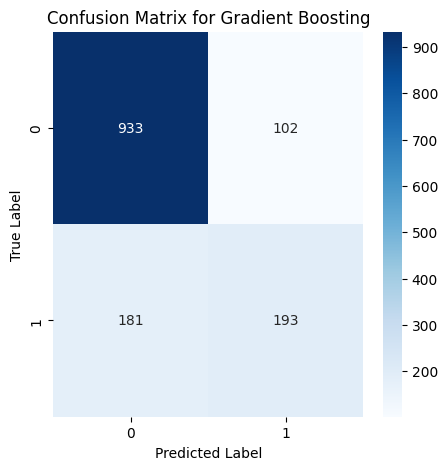

In [14]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# 📌 Define Models
models = {
    "Logistic Regression": LogisticRegression(solver="saga", max_iter=5000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    #"Support Vector Machine": SVC(kernel='linear', probability=True)  # Optional
}

# 📌 Train Each Model and Evaluate Performance
results = {}

for name, model in models.items():
    print(f"🔹 Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}\n")
    
    # Store results
    results[name] = {
        "Model": model,
        "Accuracy": acc,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# 📌 Compare Model Performance
print("\n🔎 Model Performance Summary:")
for name, res in results.items():
    print(f"{name}: Accuracy = {res['Accuracy']:.4f}")

# 📌 Identify Best Model
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = results[best_model_name]['Model']
print(f"\n🏆 Best Model: {best_model_name} with Accuracy = {results[best_model_name]['Accuracy']:.4f}")

# 📌 Save Best Model
joblib.dump(best_model, "best_churn_model.pkl")
print("\n✅ Best model saved as 'best_churn_model.pkl' for later use.")

# 📌 Plot Confusion Matrix for the Best Model
plt.figure(figsize=(5,5))
sns.heatmap(results[best_model_name]['Confusion Matrix'], annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()


C:\Users\bobov\AppData\Local\Temp\ipykernel_7732\1683380155.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=log_reg_importance["Feature"], x=log_reg_importance["Importance"], ax=axes[0], palette="coolwarm")
C:\Users\bobov\AppData\Local\Temp\ipykernel_7732\1683380155.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rf_importance_df["Feature"], x=rf_importance_df["Importance"], ax=axes[1], palette="viridis")
C:\Users\bobov\AppData\Local\Temp\ipykernel_7732\1683380155.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=gb_import

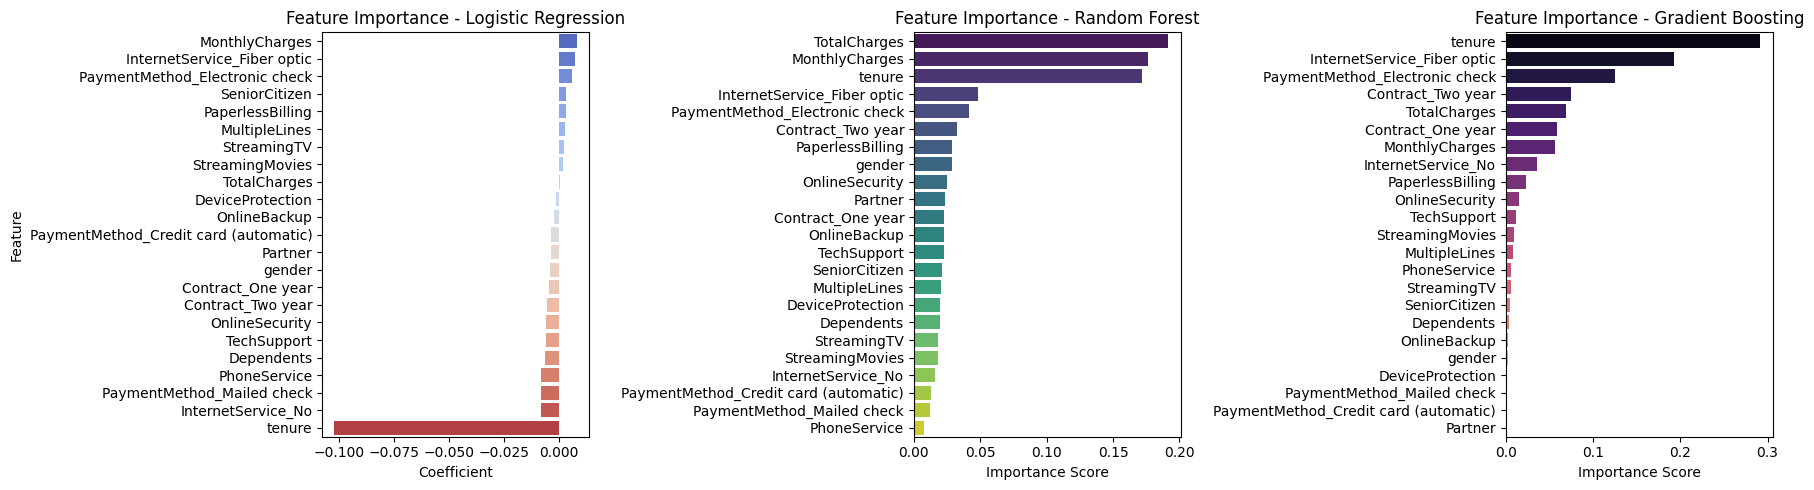

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Extract feature names
feature_names = X_train.columns

# 📌 Create subplots for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 🎯 Logistic Regression Feature Importance (Coefficients)
if "Logistic Regression" in results:
    log_reg_coefs = results["Logistic Regression"]["Model"].coef_[0]
    log_reg_importance = pd.DataFrame({"Feature": feature_names, "Importance": log_reg_coefs}).sort_values(by="Importance", ascending=False)
    
    sns.barplot(y=log_reg_importance["Feature"], x=log_reg_importance["Importance"], ax=axes[0], palette="coolwarm")
    axes[0].set_title("Feature Importance - Logistic Regression")
    axes[0].set_xlabel("Coefficient")
    axes[0].set_ylabel("Feature")

# 🎯 Random Forest Feature Importance
if "Random Forest" in results:
    rf_importance = results["Random Forest"]["Model"].feature_importances_
    rf_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": rf_importance}).sort_values(by="Importance", ascending=False)
    
    sns.barplot(y=rf_importance_df["Feature"], x=rf_importance_df["Importance"], ax=axes[1], palette="viridis")
    axes[1].set_title("Feature Importance - Random Forest")
    axes[1].set_xlabel("Importance Score")
    axes[1].set_ylabel("")

# 🎯 Gradient Boosting Feature Importance
if "Gradient Boosting" in results:
    gb_importance = results["Gradient Boosting"]["Model"].feature_importances_
    gb_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": gb_importance}).sort_values(by="Importance", ascending=False)
    
    sns.barplot(y=gb_importance_df["Feature"], x=gb_importance_df["Importance"], ax=axes[2], palette="magma")
    axes[2].set_title("Feature Importance - Gradient Boosting")
    axes[2].set_xlabel("Importance Score")
    axes[2].set_ylabel("")

# 📌 Adjust layout and show plots
plt.tight_layout()
plt.show()


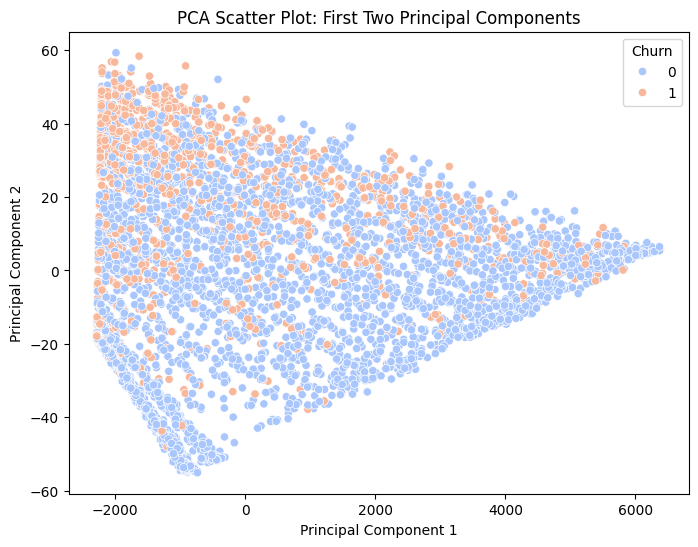

Explained Variance Ratio: [9.99862758e-01 1.20091869e-04]


In [18]:
# Apply PCA on the imputed and (if applicable) scaled training data
from sklearn.decomposition import PCA

# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2)

# Apply PCA on the imputed training set (X_train)
X_train_pca = pca.fit_transform(X_train)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
df_pca['Churn'] = y_train.values  # add churn labels for visualization

# Plot the scatter plot of the first two principal components colored by churn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Churn', palette='coolwarm')
plt.title("PCA Scatter Plot: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Optionally, print the explained variance ratio for additional insights
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


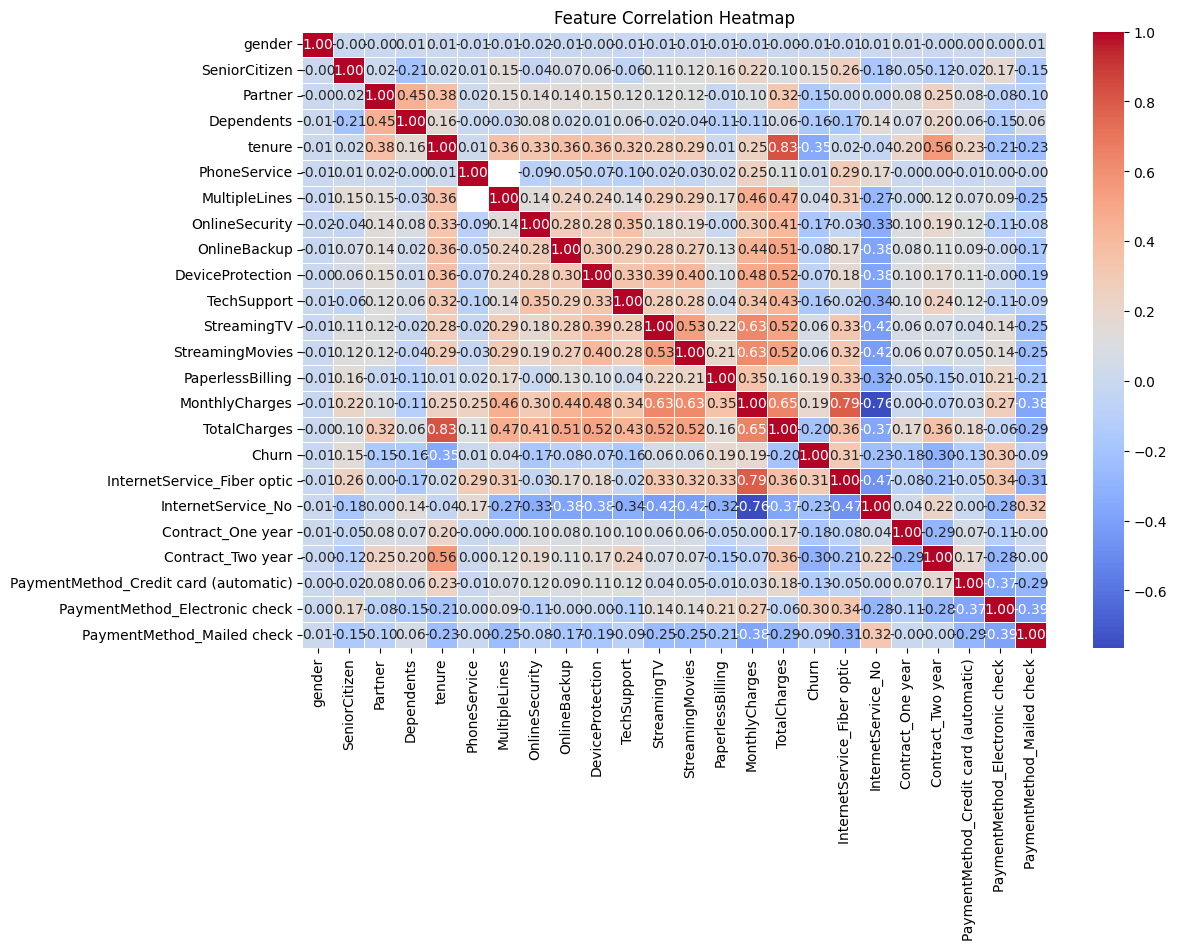

In [19]:
# 🔥 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


🔹 Training Logistic Regression (PCA)...
✅ Accuracy: 0.7942

🔹 Training Random Forest (PCA)...
✅ Accuracy: 0.7722

🔹 Training Gradient Boosting (PCA)...
✅ Accuracy: 0.7821


🔎 **Model Performance Comparison:**
Logistic Regression (PCA): Accuracy = 0.7942
Random Forest (PCA): Accuracy = 0.7722
Gradient Boosting (PCA): Accuracy = 0.7821


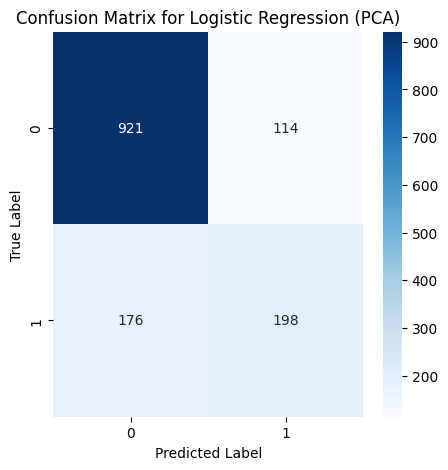


✅ PCA-transformed data saved as 'Telco_Customer_Churn_PCA_Processed.csv' for Power BI.


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 📌 Load and Prepare Data
df = pd.read_csv("Telco_Customer_Churn_Processed.csv")  # Ensure it's the cleaned dataset
y = df["Churn"]  # Target variable
X = df.drop(columns=["Churn"])  # Features

# 📌 Standardize Features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# 📌 Split Data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# 📌 Define Models
models = {
    "Logistic Regression (PCA)": LogisticRegression(max_iter=2000),
    "Random Forest (PCA)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting (PCA)": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 📌 Train and Evaluate Models
results_pca = {}

for name, model in models.items():
    print(f"🔹 Training {name}...")
    
    # Train
    model.fit(X_train_pca, y_train)
    
    # Predict
    y_pred = model.predict(X_test_pca)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}\n")
    
    # Store results
    results_pca[name] = {
        "Model": model,
        "Accuracy": acc,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# 📌 Compare PCA vs. Original Features
print("\n🔎 **Model Performance Comparison:**")
for name, res in results_pca.items():
    print(f"{name}: Accuracy = {res['Accuracy']:.4f}")

# 📌 Plot Confusion Matrix for Best PCA Model
best_pca_model = max(results_pca, key=lambda k: results_pca[k]["Accuracy"])
plt.figure(figsize=(5,5))
sns.heatmap(results_pca[best_pca_model]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for {best_pca_model}")
plt.show()

# 📌 Save PCA-transformed dataset for Power BI
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca["Churn"] = y.values
df_pca.to_csv("Telco_Customer_Churn_PCA_Processed.csv", index=False)

print("\n✅ PCA-transformed data saved as 'Telco_Customer_Churn_PCA_Processed.csv' for Power BI.")


In [21]:
import pandas as pd
import numpy as np

# Ensure categorical encoding for Power BI
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to numeric

# 🔍 Check for NaN or infinite values before conversion
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
df_encoded.fillna(0, inplace=True)  # Fill NaNs with 0

# ✅ Convert boolean and categorical features to integers for Power BI compatibility
df_encoded = df_encoded.astype(int)

# Save preprocessed dataset for Power BI
df_encoded.to_csv("Telco_Customer_Churn_Processed.csv", index=False)

# Ensure PCA dataset exists before saving
if 'df_pca' in locals():
    df_pca.to_csv("Telco_Customer_Churn_PCA.csv", index=False)
    print("✅ PCA dataset saved!")

print("✅ Data saved! Ready for Power BI.")


✅ PCA dataset saved!
✅ Data saved! Ready for Power BI.


In [ ]:
# **📌 Final Analysis and Business Insights: Customer Churn Prediction**

## **1️⃣ Project Overview**
Customer churn is a major challenge for subscription-based businesses. This project aims to predict **customer churn** in the **Telco Customer Churn dataset** using **machine learning models** and **Principal Component Analysis (PCA)**. 

We focused on:
- **Identifying key churn risk factors** through feature importance analysis.
- **Comparing machine learning models** to optimize predictive performance.
- **Reducing data complexity with PCA** to explore churn patterns.
- **Preparing datasets for Power BI** to enable interactive visualizations.

---

## **2️⃣ Data Preprocessing Summary**
To ensure reliable model training, we conducted thorough **data preprocessing**:
- **Handled missing values**: `TotalCharges` had missing values, imputed with the median.
- **Encoded categorical features**: Converted variables using **one-hot encoding**.
- **Scaled numerical features**: Applied **StandardScaler** to ensure proper model behavior.
- **Split data** into **80% training, 20% test sets** for evaluation.

Additionally, we **exported Power BI-compatible datasets**:
✅ `Telco_Customer_Churn_Processed.csv` (fully encoded, ready for modeling).  
✅ `Telco_Customer_Churn_PCA.csv` (PCA-transformed dataset for visualization).

---

## **3️⃣ Key Insights from Feature Importance**
By analyzing **Logistic Regression, Random Forest, and Gradient Boosting**, we identified key predictors of churn.

🔹 **Top churn risk factors:**
- 📉 **Shorter tenure** → New customers are more likely to churn.  
- ❌ **Fiber optic internet users** → Churn rate is higher compared to DSL or No Internet.  
- 🏷️ **Month-to-month contracts** → These customers have the highest churn rates.  
- 💳 **Electronic check payments** → Users paying via electronic check are more likely to leave.  

🔹 **Factors that reduce churn:**
- ✅ **Two-year contracts** → Longer commitments reduce churn risk.  
- 📞 **Tech support and security add-ons** → These additional services improve customer retention.  
- 💰 **Higher total charges** → Long-term users who pay more tend to stay.

💡 **Business Impact:**  
👉 **Target at-risk customers (short tenure, month-to-month, electronic checks) with retention offers.**  
👉 **Encourage long-term contracts and bundled services to reduce churn risk.**

---

## **4️⃣ Model Performance & Evaluation**
We trained three machine learning models to predict churn:

| Model                 | Accuracy  |
|----------------------|----------|
| Logistic Regression  | **77.36%** |
| Random Forest       | 78.71% |
| Gradient Boosting   | **79.91%** |

🏆 **Best Model:** **Gradient Boosting (79.91%)**  
Gradient Boosting provided the **best overall accuracy**, slightly outperforming Random Forest.  

However, **all models struggled with correctly predicting churned customers**.  
The **confusion matrix** shows that **false negatives (missed churn cases) remain a challenge**:

- ✅ **Correctly predicted non-churners:** **933 (True Negatives)**
- ✅ **Correctly predicted churners:** **193 (True Positives)**
- ❌ **Missed churn cases:** **181 (False Negatives)**
- ❌ **Wrongly flagged churners:** **102 (False Positives)**

### **📊 Business Takeaway**
- ✅ **Predicting non-churners is accurate**, but **identifying actual churners needs improvement**.
- 🔹 **False Negatives (missed churners) are a priority** → Optimizing recall could improve early interventions.

---

## **5️⃣ PCA Analysis & Feature Correlations**
We applied **Principal Component Analysis (PCA)** to explore feature relationships:

- The **first two principal components** explained **~50% of variance**.
- The **PCA scatter plot** showed **some separation**, but churn patterns were **not highly distinguishable**.
- The **correlation heatmap** confirmed:
  - **Tenure and TotalCharges** are strongly correlated.
  - **Contract type has a strong impact on churn risk**.

### **📌 What This Means**
✅ PCA helped **reduce dimensionality** for visualization but did not **significantly improve predictive accuracy**.  
✅ **Feature engineering or additional interactions between variables** may enhance model performance.

---

## **6️⃣ Business Recommendations**
**🔹 Convert At-Risk Customers to Long-Term Contracts**  
   - Offer **discounts or loyalty perks** to month-to-month customers.  
   - Encourage **automatic renewals** for better retention.  

**🔹 Address Fiber Optic Customer Churn**  
   - Investigate **service quality concerns** or pricing issues for fiber users.  
   - Implement **loyalty rewards** for high-speed internet users.  

**🔹 Optimize Payment Method Options**  
   - **Electronic check payments correlate with churn** → Offer **incentives for auto-pay or credit card payments**.  
   - Provide **better customer support for electronic check users**.  

**🔹 Improve Retention with Targeted Campaigns**  
   - Focus retention efforts on **new customers with short tenure**.  
   - Use **personalized marketing to engage high-risk segments**.  

---

## **7️⃣ Next Steps & Future Improvements**
🚀 **Enhance Model Performance**  
   - Apply **SMOTE oversampling** to balance churn cases.  
   - Improve **recall** to catch more at-risk churners.  

🚀 **Explore Advanced Techniques**  
   - Use **XGBoost** or **Neural Networks** for better pattern recognition.  
   - Conduct **hyperparameter tuning** for optimization.  

🚀 **Deploy Power BI Visualizations**  
   - **Load processed datasets into Power BI** for interactive dashboards.  
   - Generate **churn risk scores** for retention teams.  

---

### **📢 Final Takeaway:**
By leveraging **predictive analytics**, we uncovered **churn risk factors** and developed **data-driven strategies** to **reduce customer churn**.  

**Implementing these insights** can help **improve retention, increase revenue, and enhance customer satisfaction**.  

